In [1]:
import pandas as pd
results = []
temps = [0.0, 0.5, 1.0,  1.5, 2.0]
for temp in temps:
    record_path = f'../eval_results/eval_results_gpt_3_5/ajgt_temp_tuning/ajgt-{temp}.jsonl'
    with open(record_path, "r") as f:
        events_df = pd.read_json(f, lines=True)
    results.append(['GPT-3.5', temp,  round(events_df[events_df["final_report"].notnull()]["final_report"].to_list()[0]['accuracy'], 4)])

In [3]:
import pandas as pd
for temp in temps:
    record_path = f'../eval_results/eval_results_gpt_4_0/ajgt_temp_tuning/ajgt-{temp}.jsonl'
    with open(record_path, "r") as f:
        events_df = pd.read_json(f, lines=True)
    results.append(['GPT-4.0', temp,  round(events_df[events_df["final_report"].notnull()]["final_report"].to_list()[0]['accuracy'], 4)])

In [4]:
results

[['GPT-3.5', 0.0, 0.8778],
 ['GPT-3.5', 0.5, 0.8861],
 ['GPT-3.5', 1.0, 0.8812],
 ['GPT-3.5', 1.5, 0.8806],
 ['GPT-3.5', 2.0, 0.8917],
 ['GPT-4.0', 0.0, 0.903],
 ['GPT-4.0', 0.5, 0.8926],
 ['GPT-4.0', 1.0, 0.8989],
 ['GPT-4.0', 1.5, 0.8956],
 ['GPT-4.0', 2.0, 0.9006]]

In [5]:
df = pd.DataFrame(results)
df.columns = ['Model', 'Temperature', 'Accuracy']

In [6]:
df

,Model,Temperature,Accuracy
0,GPT-3.5,0.0,0.8778
1,GPT-3.5,0.5,0.8861
2,GPT-3.5,1.0,0.8812
3,GPT-3.5,1.5,0.8806
4,GPT-3.5,2.0,0.8917
5,GPT-4.0,0.0,0.9030
6,GPT-4.0,0.5,0.8926
7,GPT-4.0,1.0,0.8989
8,GPT-4.0,1.5,0.8956
9,GPT-4.0,2.0,0.9006


In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("Paired")

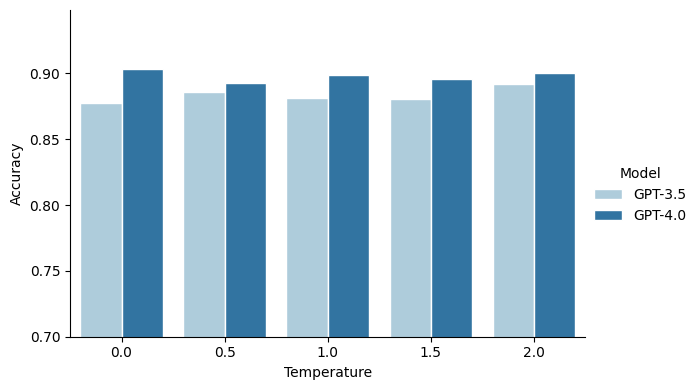

In [35]:
sns.catplot(
    x="Temperature", 
    y="Accuracy", 
    data=df, 
    kind="bar",
    hue = "Model",
    errorbar = "sd", 
    edgecolor="white",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.1,
    height=4, 
    aspect=1.5,)
plt.ylim(0.7)
plt.savefig("../figures/temp_tuning.pdf")